# Part I: Data Preparation and Analysis

## Add all necessary imports

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import PCA

In [103]:
rssi_dataset = pd.read_csv('./dataset_Seminar3/rssi_data.csv')
labels_dataset = pd.read_csv('./dataset_Seminar3/labels_data.csv')

# Check the first few rows of the datasets
print(rssi_dataset.head())
print(labels_dataset.head())

# Check the shape of the datasets
print(rssi_dataset.shape)
print(labels_dataset.shape)

# Check the data types
print(rssi_dataset.dtypes)
print(labels_dataset.dtypes)

   -21.949  -99.659  -42.257
0  -34.049  -95.964  -47.779
1  -18.861 -100.000  -34.175
2  -53.497  -77.368  -67.360
3  -54.986  -73.012  -69.780
4  -52.012  -84.214  -73.244
   5
0  4
1  5
2  2
3  2
4  2
(1499, 3)
(1499, 1)
-21.949    float64
-99.659    float64
-42.257    float64
dtype: object
5    int64
dtype: object


## 2D Plot of the RSSI values perceived by each pair of APs

/var/folders/l0/1yhl7r590v37jd1wr6xrg3hc0000gp/T/ipykernel_20841/1108627740.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


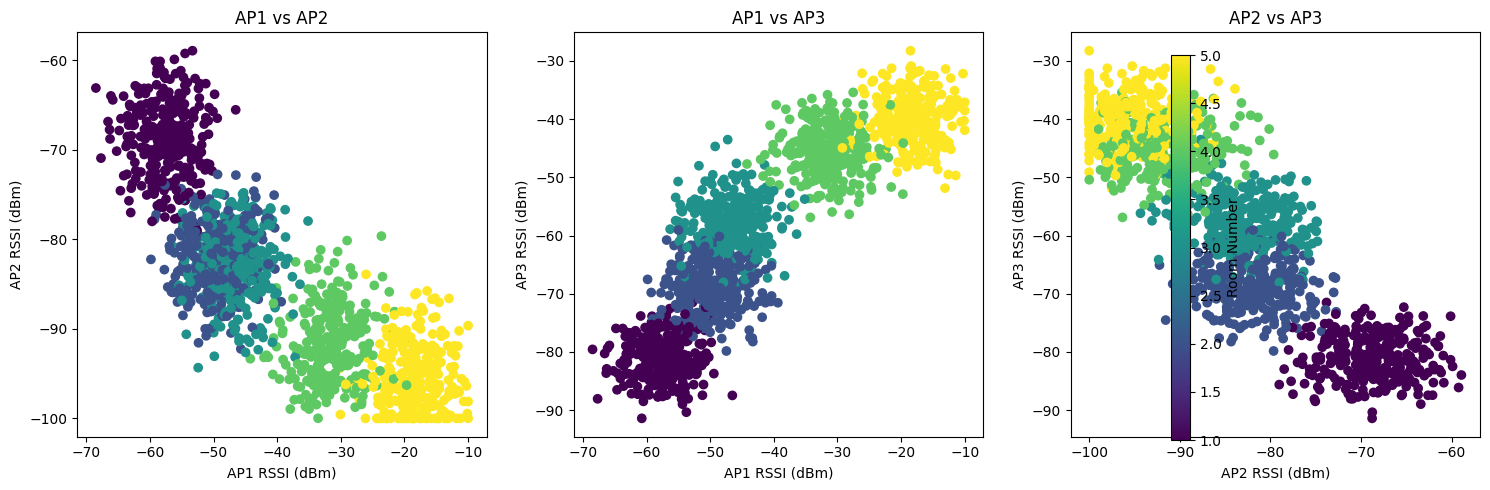

In [104]:
# Create a figure with subplots for each pair of APs
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot AP1 vs AP2
axes[0].scatter(rssi_dataset.iloc[:, 0], rssi_dataset.iloc[:, 1], c=labels_dataset.iloc[:, 0], cmap='viridis')
axes[0].set_xlabel('AP1 RSSI (dBm)')
axes[0].set_ylabel('AP2 RSSI (dBm)')
axes[0].set_title('AP1 vs AP2')

# Plot AP1 vs AP3
axes[1].scatter(rssi_dataset.iloc[:, 0], rssi_dataset.iloc[:, 2], c=labels_dataset.iloc[:, 0], cmap='viridis')
axes[1].set_xlabel('AP1 RSSI (dBm)')
axes[1].set_ylabel('AP3 RSSI (dBm)')
axes[1].set_title('AP1 vs AP3')

# Plot AP2 vs AP3
axes[2].scatter(rssi_dataset.iloc[:, 1], rssi_dataset.iloc[:, 2], c=labels_dataset.iloc[:, 0], cmap='viridis')
axes[2].set_xlabel('AP2 RSSI (dBm)')
axes[2].set_ylabel('AP3 RSSI (dBm)')
axes[2].set_title('AP2 vs AP3')

# Add colorbar
plt.colorbar(axes[0].collections[0], ax=axes, label='Room Number')

# Adjust layout and display
plt.tight_layout()
plt.show()


##### The figure above shows three 2D scatter plots, each representing the relationship between the RSSI (Received Signal Strength Indicator) values measured by pairs of WiFi Access Points (APs) for a set of samples. Each point corresponds to a measurement, colored by the room label (as indicated by the colorbar). The data appears to be clustered by room, with each room forming a distinct group in RSSI space. This suggests that the RSSI values from the three APs provide enough information to distinguish between rooms, which is the basis for applying machine learning to the WiFi localization problem described in SEM3_STATEMENT.pdf. The separation between clusters in each subplot indicates that a classification model could learn to map RSSI values to room labels with good accuracy.


## 3D Plot showing the RSSI values perceived by each of the 3 APs

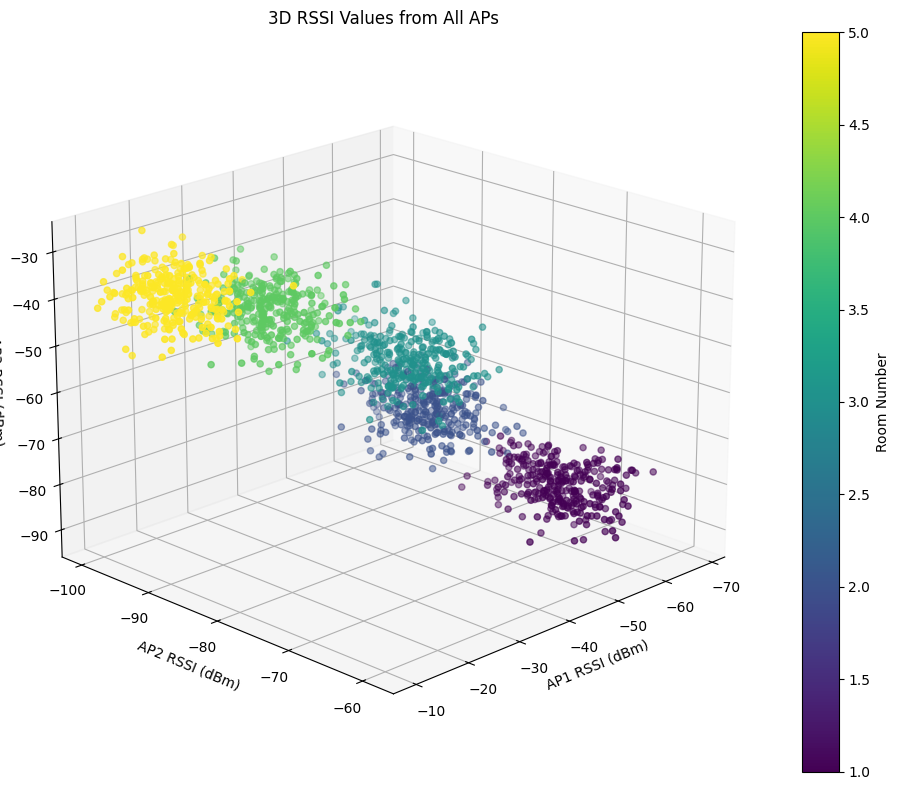

In [105]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(rssi_dataset.iloc[:, 0], 
                    rssi_dataset.iloc[:, 1], 
                    rssi_dataset.iloc[:, 2],
                    c=labels_dataset.iloc[:, 0],
                    cmap='viridis')

ax.set_xlabel('AP1 RSSI (dBm)')
ax.set_ylabel('AP2 RSSI (dBm)')
ax.set_zlabel('AP3 RSSI (dBm)')
ax.set_title('3D RSSI Values from All APs')

plt.colorbar(scatter, label='Room Number')

ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()


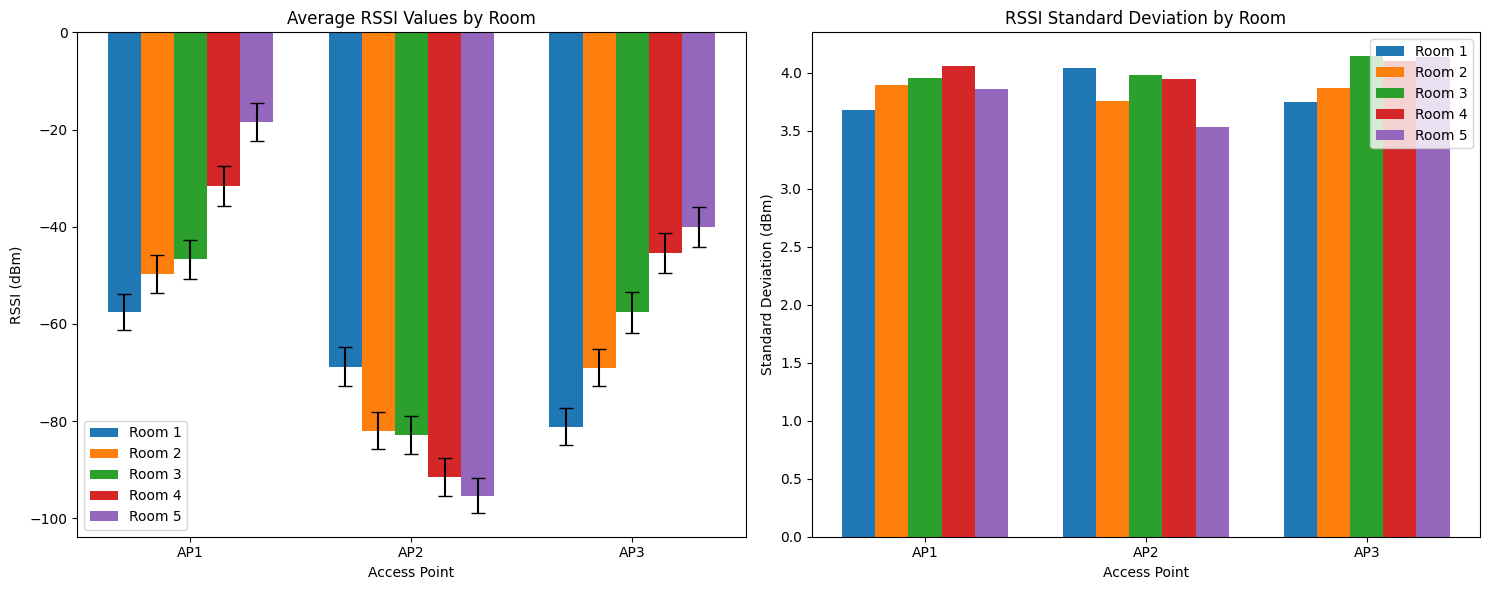


Detailed Statistics by Room:
--------------------------------------------------

Room 1:
Mean RSSI values:
AP1: -57.55 dBm
AP2: -68.77 dBm
AP3: -81.16 dBm
Standard deviations:
AP1: 3.68 dBm
AP2: 4.04 dBm
AP3: 3.75 dBm

Room 2:
Mean RSSI values:
AP1: -49.81 dBm
AP2: -81.98 dBm
AP3: -68.98 dBm
Standard deviations:
AP1: 3.89 dBm
AP2: 3.76 dBm
AP3: 3.87 dBm

Room 3:
Mean RSSI values:
AP1: -46.74 dBm
AP2: -82.88 dBm
AP3: -57.63 dBm
Standard deviations:
AP1: 3.95 dBm
AP2: 3.98 dBm
AP3: 4.14 dBm

Room 4:
Mean RSSI values:
AP1: -31.58 dBm
AP2: -91.49 dBm
AP3: -45.48 dBm
Standard deviations:
AP1: 4.06 dBm
AP2: 3.94 dBm
AP3: 4.10 dBm

Room 5:
Mean RSSI values:
AP1: -18.47 dBm
AP2: -95.33 dBm
AP3: -40.07 dBm
Standard deviations:
AP1: 3.86 dBm
AP2: 3.53 dBm
AP3: 4.13 dBm


In [106]:
# Calculate statistics for each room
room_stats = []
for room in range(1, 6):
    room_data = rssi_dataset[labels_dataset.iloc[:, 0] == room]
    means = room_data.mean()
    stds = room_data.std()
    room_stats.append({
        'room': room,
        'means': means,
        'stds': stds
    })

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot means
x = np.arange(3)
width = 0.15
for i, stats in enumerate(room_stats):
    ax1.bar(x + i*width, stats['means'], width, 
            label=f'Room {stats["room"]}',
            yerr=stats['stds'],
            capsize=5)

ax1.set_xlabel('Access Point')
ax1.set_ylabel('RSSI (dBm)')
ax1.set_title('Average RSSI Values by Room')
ax1.set_xticks(x + width*2)
ax1.set_xticklabels(['AP1', 'AP2', 'AP3'])
ax1.legend()

# Plot standard deviations
for i, stats in enumerate(room_stats):
    ax2.bar(x + i*width, stats['stds'], width, 
            label=f'Room {stats["room"]}')

ax2.set_xlabel('Access Point')
ax2.set_ylabel('Standard Deviation (dBm)')
ax2.set_title('RSSI Standard Deviation by Room')
ax2.set_xticks(x + width*2)
ax2.set_xticklabels(['AP1', 'AP2', 'AP3'])
ax2.legend()

plt.tight_layout()
plt.show()

# Print numerical statistics
print("\nDetailed Statistics by Room:")
print("-" * 50)
for stats in room_stats:
    print(f"\nRoom {stats['room']}:")
    print("Mean RSSI values:")
    for ap, mean in enumerate(stats['means'], 1):
        print(f"AP{ap}: {mean:.2f} dBm")
    print("Standard deviations:")
    for ap, std in enumerate(stats['stds'], 1):
        print(f"AP{ap}: {std:.2f} dBm")


##### - The left plot displays the average RSSI values for each access point in each room, with error bars indicating standard deviation.
#####   We observe that Room 5 has the highest (least negative) RSSI values, while other rooms have lower (more negative) values, indicating weaker signals.
#####   The error bars suggest some variability in signal strength within each room.
##### - The right plot shows the standard deviation of RSSI values for each access point in each room.
#####   The standard deviations are relatively consistent across rooms and access points, generally ranging between 3.5 and 4.0 dBm.
#####   This suggests that while mean RSSI values differ by room, the variability of the signal within each room is similar.


# Part II: k-means implementation

In [107]:
def kmeans(X, k=5, max_iters=100):
    """
    Simple k-means clustering implementation for WiFi fingerprinting
    
    Parameters:
    X: Input data matrix (n_samples, n_features) - RSSI values from APs
    k: Number of clusters (rooms)
    max_iters: Maximum number of iterations
    
    Returns:
    labels: Cluster assignments for each point
    centroids: Final centroid positions
    """
    # Get dimensions
    n_samples, n_features = X.shape
    
    # Randomly initialize centroids
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    # Initialize labels array
    labels = np.zeros(n_samples)
    prev_labels = None
    
    # Main k-means loop
    for iteration in range(max_iters):
        # Step 1: Assign points to nearest centroid
        for i in range(n_samples):
            # Calculate distances to all centroids
            distances = np.sqrt(np.sum((X[i] - centroids)**2, axis=1))
            # Assign to nearest centroid
            labels[i] = np.argmin(distances)
        
        # Step 2: Update centroids
        new_centroids = np.zeros((k, n_features))
        for j in range(k):
            # Get points in this cluster
            cluster_points = X[labels == j]
            if len(cluster_points) > 0:
                # Update centroid as mean of cluster points
                new_centroids[j] = np.mean(cluster_points, axis=0)
            else:
                # If cluster is empty, reinitialize centroid randomly
                new_centroids[j] = X[np.random.choice(n_samples, 1)]
                print(f"Cluster {j} was empty - reinitialized centroid")
        
        # Check for convergence conditions
        if prev_labels is not None and np.array_equal(labels, prev_labels):
            print(f"Converged after {iteration + 1} iterations: No change in cluster assignments")
            break
            
        if iteration == max_iters - 1:
            print(f"Reached maximum iterations ({max_iters})")
            
        prev_labels = labels.copy()
        centroids = new_centroids
    
    return labels, centroids


Converged after 52 iterations: No change in cluster assignments
Clustering Accuracy: 95.86%


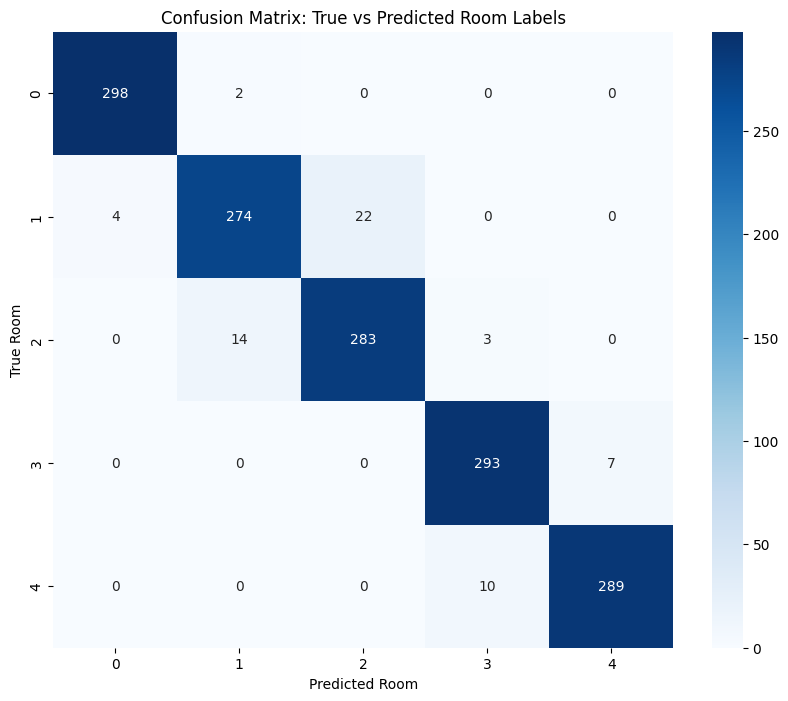

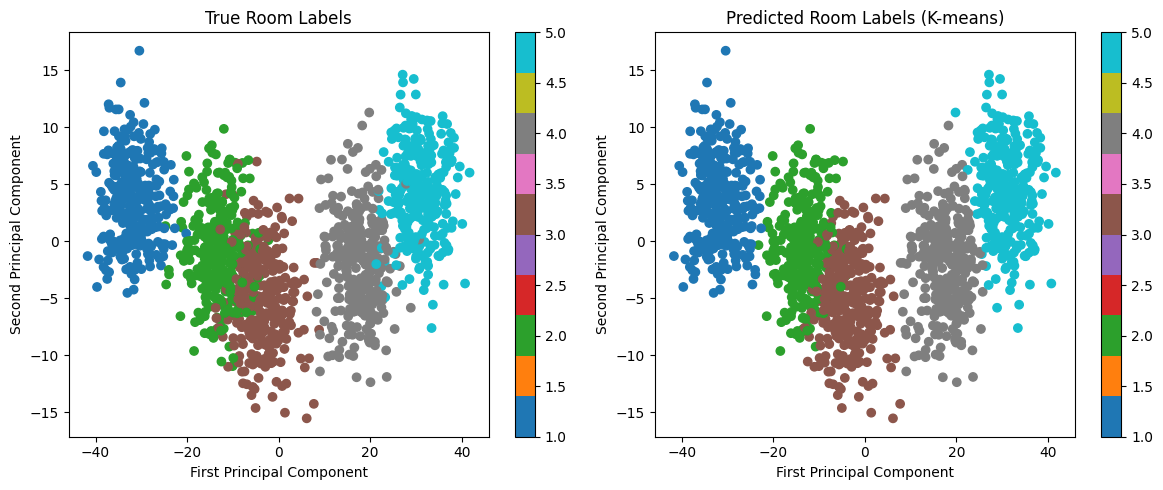

In [139]:
# Apply k-means clustering
predicted_labels, centroids = kmeans(rssi_dataset.values, k=5)

# Map cluster labels to room numbers
# First, create a mapping based on the most common true label in each cluster
mapping = {}
for cluster in range(5):
    # Get indices of points in this cluster
    cluster_indices = np.where(predicted_labels == cluster)[0]
    # Get the true labels for these points
    cluster_true_labels = labels_dataset.values[cluster_indices].ravel()
    # Find the most common true label
    most_common_label = np.bincount(cluster_true_labels).argmax()
    # Map this cluster to the most common true label
    mapping[cluster] = most_common_label

# Apply the mapping to predicted labels
mapped_labels = np.array([mapping[label] for label in predicted_labels])

# Calculate accuracy with mapped labels
accuracy = accuracy_score(labels_dataset.values.ravel(), mapped_labels)
print(f"Clustering Accuracy: {accuracy:.2%}")

# Create confusion matrix
cm = confusion_matrix(labels_dataset.values.ravel(), mapped_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: True vs Predicted Room Labels')
plt.xlabel('Predicted Room')
plt.ylabel('True Room')
plt.show()

# Plot 2D visualization using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(rssi_dataset.values)

plt.figure(figsize=(12, 5))

# Plot true labels
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_dataset.values.ravel(), cmap='tab10')
plt.title('True Room Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)

# Plot predicted labels
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=mapped_labels, cmap='tab10')
plt.title('Predicted Room Labels (K-means)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

#### K-means Clustering Results Review

##### Confusion Matrix
The confusion matrix shows that most samples are correctly clustered into their true rooms, with the majority of values concentrated along the diagonal. This indicates strong agreement between the predicted clusters and the actual room labels. Some off-diagonal values are present, indicating occasional misclassifications, particularly between rooms 2 and 3, and between rooms 4 and 5. These confusions may be due to similarities in WiFi signal patterns between those rooms.

##### PCA Visualization
The 2D PCA plots provide a visual comparison between the true room labels and the k-means predicted clusters. Both plots show well-separated clusters, and the predicted clusters closely match the true room groupings. This further confirms that the algorithm is able to capture the underlying structure of the data.

#### Algorithm Performance
- **Clustering Accuracy:** The clustering accuracy varies between runs (typically 77% to 95%) due to the random initialization of centroids in k-means. In the best runs, the algorithm achieves high accuracy, demonstrating that WiFi RSSI values are effective features for room localization.
- **Cluster Separation:** Most rooms are well-separated, but some overlap exists, especially between rooms with similar signal characteristics.
- **Stability:** The results can vary depending on initialization. Running k-means multiple times or using smarter initialization (k-means++) can improve stability.

#### Conclusion
Overall, k-means clustering performs well on the WiFi fingerprinting dataset, with high accuracy and clear cluster separation in most cases. The algorithm is able to group samples by room based on RSSI values, making it a useful unsupervised approach for indoor localization tasks. However, some room pairs are more difficult to distinguish, and results may vary between runs due to the nature of k-means.